In [1]:
# Import some libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
pd.set_option('max_columns', 50)

In [2]:
user_data = pd.read_csv('CSV/user.csv')

In [3]:
user_data.head(5)

,yelping_since,useful,compliment_photos,compliment_list,compliment_funny,compliment_plain,review_count,elite,fans,compliment_note,funny,compliment_writer,compliment_cute,average_stars,user_id,compliment_more,friends,compliment_hot,cool,name,compliment_profile,compliment_cool
0,2015-09-28,0,0,0,0,0,1,None,0,0,0,0,0,2.00,lzlZwIpuSWXEnNS91wxjHw,0,None,0,0,Susan,0,0
1,2015-09-05,0,0,0,0,0,2,None,0,0,0,0,0,5.00,XvLBr-9smbI0m_a7dXtB7w,0,None,0,0,Daipayan,0,0
2,2016-07-21,0,0,0,0,0,1,None,0,0,0,0,0,4.00,QPT4Ud4H5sJVr68yXhoWFw,0,None,0,0,Andy,0,0
3,2014-08-04,0,0,0,0,0,19,None,0,0,0,0,0,4.05,i5YitlHZpf0B3R0s_8NVuw,0,None,0,0,Jonathan,0,0
4,2017-06-18,0,0,0,0,0,3,None,0,0,0,0,0,3.00,s4FoIXE_LSGviTHBe8dmcg,0,None,0,0,Shashank,0,0


In [4]:
user_data['votes'] = user_data['useful'] + user_data['funny'] + user_data['cool']
user_data.drop(['useful', 'funny', 'cool'], axis = 1, inplace = True)
compliment_columns = [col for col in user_data.columns if 'compliment_' in col]
user_data['compliments'] = 0
for col in compliment_columns:
    user_data['compliments'] = user_data['compliments'].add(user_data[col])
user_data.drop(compliment_columns, axis = 1, inplace = True)
user_data.head()

,yelping_since,review_count,elite,fans,average_stars,user_id,friends,name,votes,compliments
0,2015-09-28,1,None,0,2.00,lzlZwIpuSWXEnNS91wxjHw,None,Susan,0,0
1,2015-09-05,2,None,0,5.00,XvLBr-9smbI0m_a7dXtB7w,None,Daipayan,0,0
2,2016-07-21,1,None,0,4.00,QPT4Ud4H5sJVr68yXhoWFw,None,Andy,0,0
3,2014-08-04,19,None,0,4.05,i5YitlHZpf0B3R0s_8NVuw,None,Jonathan,0,0
4,2017-06-18,3,None,0,3.00,s4FoIXE_LSGviTHBe8dmcg,None,Shashank,0,0


In [5]:
from pandas.plotting import scatter_matrix
temp_df = user_data[['review_count', 'fans', 'average_stars', 'votes', 'compliments']]

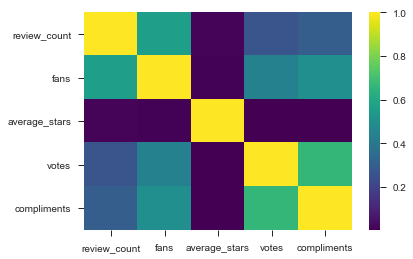

In [6]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
corr = temp_df.corr()
sns.heatmap(corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3e5590>,
      dtype=object)

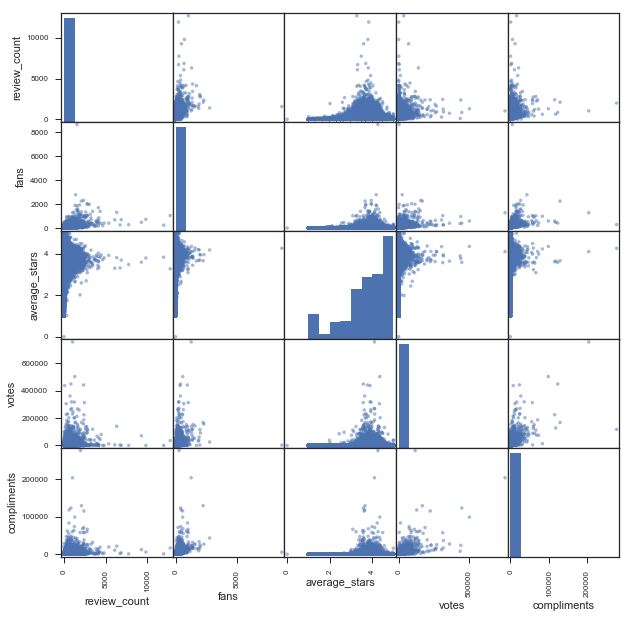

In [7]:
scatter_matrix(temp_df, figsize=(10, 10), diagonal='hist')

In [ ]:
def f(x):
    print x
user_data['friends'].apply(lambda x: f(x))

If reviewer has very less review count, we can not learn more about the reviewer.
Therefore, we clean the data to have only those users who reviewed at least 30 reviews.

In [5]:
user_data = user_data[user_data.review_count >= 30]
user_data.head()

,yelping_since,review_count,elite,fans,average_stars,user_id,friends,name,votes,compliments
74,2009-12-26,84,None,1,3.75,rMkz1mjevjl8xqrypZwHzw,None,Daniel,3,3
95,2011-03-02,163,None,0,3.76,mN1eee0_j-dglmm57NAf3w,None,j,0,0
103,2011-12-31,32,None,0,3.54,68qmfoSUXpPUaXz_VEyqzA,None,Mary,5,1
195,2009-01-16,85,None,0,3.26,ZQ8ZXepUHhT-RB-THcCzEw,None,M,3,2
388,2011-11-14,44,None,6,3.56,F25PhUqmsJhff_thUyuP8Q,None,Mark,18,0


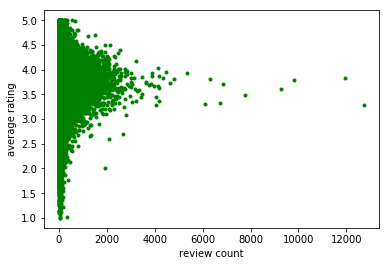

In [6]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(user_data['review_count'], user_data['average_stars'], 'g.')
plt.xlabel('review count')
plt.ylabel('average rating')
plt.show()

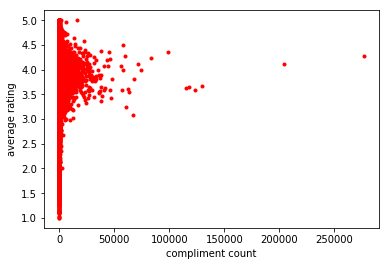

In [7]:
plt.plot(user_data['compliments'], user_data['average_stars'], 'r.')
plt.xlabel('compliment count')
plt.ylabel('average rating')
plt.show()

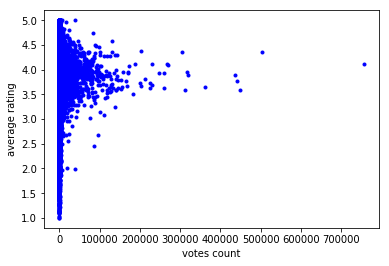

In [8]:
plt.plot(user_data['votes'], user_data['average_stars'], 'b.')
plt.xlabel('votes count')
plt.ylabel('average rating')
plt.show()

In [9]:
review = pd.read_csv('review_no_text.csv')
review.head()

,funny,user_id,review_id,business_id,stars,date,useful,cool
0,0,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,0,0
1,0,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,0,0
2,1,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,3,1
3,0,msQe1u7Z_XuqjGoqhB0J5g,Er4NBWCmCD4nM8_p1GRdow,elqbBhBfElMNSrjFqW3now,2,2011-02-25,2,0
4,0,msQe1u7Z_XuqjGoqhB0J5g,jsDu6QEJHbwP2Blom1PLCA,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,0,0


In [10]:
review_data = pd.read_csv('review.csv', dtype = {'stars' : np.int})
review_data.head()

,funny,user_id,review_id,text,business_id,stars,date,useful,cool
0,0,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,The pizza was okay. Not the best I've had. I p...,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,0,0
1,0,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,I love this place! My fiance And I go here atl...,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,0,0
2,1,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,Terrible. Dry corn bread. Rib tips were all fa...,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,3,1
3,0,msQe1u7Z_XuqjGoqhB0J5g,Er4NBWCmCD4nM8_p1GRdow,Back in 2005-2007 this place was my FAVORITE t...,elqbBhBfElMNSrjFqW3now,2,2011-02-25,2,0
4,0,msQe1u7Z_XuqjGoqhB0J5g,jsDu6QEJHbwP2Blom1PLCA,Delicious healthy food. The steak is amazing. ...,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,0,0


In [18]:
import folium as fol
from shapely.geometry import Point
from shapely.geometry import shape
import geopandas as gpd
import os
import json

/anaconda2/envs/yelplatest/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [43]:
business_data = pd.read_csv('business.csv')
business_data.head(2)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.GoodForKids,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,business_id,attributes.RestaurantsCounterService,attributes.Corkage,attributes.RestaurantsGoodForGroups,...,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.BusinessAcceptsCreditCards,attributes.DriveThru,attributes.HasTV,attributes.Music,hours,attributes.BusinessParking,attributes.WiFi,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,11:0-21:0,False,NaN,NaN,NaN,T2E 6L6,NaN,11:0-21:0,NaN,Calgary,11:0-21:0,True,NaN,NaN,11:0-21:0,4.0,51.091813,NaN,2.0,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,NaN,NaN,True,...,-114.031675,8:30-17:0,NaN,11:0-21:0,24,NaN,average,AB,True,NaN,True,NaN,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...","{'garage': False, 'street': True, 'validated':...",NaN,casual,NaN,NaN,NaN,NaN,True,"{'BusinessParking': ""{'garage': False, 'street...",True,False,False
1,NaN,False,NaN,True,NaN,89002,NaN,NaN,NaN,Henderson,NaN,True,NaN,NaN,17:0-23:0,4.5,35.960734,none,2.0,False,NaN,AjEbIBw6ZFfln7ePHha9PA,NaN,NaN,True,...,-114.939821,NaN,NaN,17:0-23:0,3,NaN,NaN,NV,True,False,False,NaN,"{'Sunday': '17:0-23:0', 'Friday': '17:0-23:0',...","{'garage': False, 'street': True, 'validated':...",no,casual,17:0-23:0,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,"{'RestaurantsTableService': 'False', 'GoodForM...",True,False,True


In [60]:
from collections import Iterable

categories = business_data['categories'].unique()
hm = {}
for cat in categories:
    if not isinstance(cat, Iterable):
        continue
    if 'Restaurants' in cat or 'Food' in cat:
        if 'restaurants' not in hm:
            hm['restaurants'] = 1
        else:
            hm['restaurants'] += 1
    elif 'Services' in cat :
        if 'services' not in hm:
            hm['services'] = 1
        else:
            hm['services'] += 1
    elif 'Shopping' in cat :
        if 'shopping' not in hm:
            hm['shopping'] = 1
        else:
            hm['shopping'] += 1
    elif 'Salon' in cat :
        if 'salons' not in hm:
            hm['salons'] = 1
        else:
            hm['salons'] += 1
    elif 'Auto' in cat :
        if 'automotive' not in hm:
            hm['automotive'] = 1
        else:
            hm['automotive'] += 1

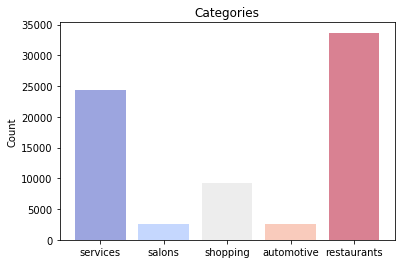

In [79]:
np.random.seed(19680801)
x=[]
vals = []
for key, val in hm.iteritems():
    x.append(val)
    vals.append(key)
N = len(x)
y=[i for i in range(N)]
cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0, 1, N))
plt.bar(y, x, alpha=0.5, color = colors)
plt.ylabel('Count')
plt.title('Categories')
plt.xticks(y, vals)
plt.show()

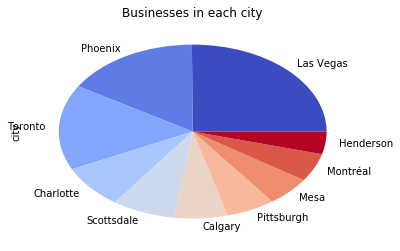

In [84]:
business_data['city'].value_counts().head(10).plot(kind='pie', title ='Businesses in each city', colormap='coolwarm')

In [88]:
business_city = {}
n = len(business_data)
for i in range(n):
    k1 = str(business_data.categories.iloc[i]).split(',')
    k2 = business_data.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].T.plot(title ='specific business count per city', colormap='coolwarm')

KeyboardInterrupt: 

In [89]:
review.head()

,funny,user_id,review_id,business_id,stars,date,useful,cool
0,0,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,0,0
1,0,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,0,0
2,1,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,3,1
3,0,msQe1u7Z_XuqjGoqhB0J5g,Er4NBWCmCD4nM8_p1GRdow,elqbBhBfElMNSrjFqW3now,2,2011-02-25,2,0
4,0,msQe1u7Z_XuqjGoqhB0J5g,jsDu6QEJHbwP2Blom1PLCA,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,0,0


In [90]:
df_merged = review.merge(business_data[['city','categories', 'business_id']], how = 'outer', on= 'business_id')
df_merged.head()

,funny,user_id,review_id,business_id,stars,date,useful,cool,city,categories
0,0,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,0,0,Las Vegas,"Pizza, Restaurants"
1,0,D1_nrBr4dOrs7M82OaBRwQ,VluIpojME0yKOcRKI5L0Iw,iCQpiavjjPzJ5_3gPD5Ebg,3,2011-10-25,0,0,Las Vegas,"Pizza, Restaurants"
2,0,jEjc8HxeCeI22M4di0Y1aw,nsB9JAeghk0zOaSulSm9Yw,iCQpiavjjPzJ5_3gPD5Ebg,5,2016-05-22,0,0,Las Vegas,"Pizza, Restaurants"
3,0,RTiaaHSN80VRTLSdNK5rfQ,pcn01EMERpCpHEcoaohdEg,iCQpiavjjPzJ5_3gPD5Ebg,5,2014-12-30,0,0,Las Vegas,"Pizza, Restaurants"
4,0,hBmJs49zYcXdV4wo8F5iiA,0mFtAPTmInbXHqDjX9eiOg,iCQpiavjjPzJ5_3gPD5Ebg,5,2013-03-24,0,0,Las Vegas,"Pizza, Restaurants"


In [91]:
def topm_num_reviews_for_city_n_biz(df,m):
    business_city_count = {}
    n = len(df)
    for i in range(n):
        k1 = str(df.categories.iloc[i]).split(',')
        k2 = df.city.iloc[i]
        for j in k1:
            k = (j,k2)
            if k not in business_city_count.keys():
                business_city_count[k] = 1
            else:
                business_city_count[k] += 1
    business_city_count_series = pd.Series(business_city_count)
    business_city_count_series.sort_values(ascending = False, inplace = True)
    return business_city_count_series

In [ ]:
review_business_city = topm_num_reviews_for_city_n_biz(df_merged,10)
review_business_city[:30].plot(kind = 'bar')

In [29]:
for col in business_data.columns:
    print col

hours.Wednesday
attributes.RestaurantsDelivery
attributes.Open24Hours
attributes.DogsAllowed
attributes.CoatCheck
postal_code
attributes.Smoking
hours.Thursday
attributes.DietaryRestrictions
city
hours.Tuesday
attributes.GoodForKids
attributes.BYOB
attributes.AgesAllowed
hours.Friday
stars
latitude
attributes.Alcohol
attributes.RestaurantsPriceRange2
attributes.RestaurantsTableService
attributes.HairSpecializesIn
business_id
attributes.RestaurantsCounterService
attributes.Corkage
attributes.RestaurantsGoodForGroups
categories
name
attributes.BusinessAcceptsBitcoin
attributes.HappyHour
attributes.WheelchairAccessible
attributes.Caters
attributes.BYOBCorkage
is_open
address
neighborhood
attributes.Ambience
longitude
hours.Monday
attributes.BestNights
hours.Saturday
review_count
attributes.ByAppointmentOnly
attributes.NoiseLevel
state
attributes.BusinessAcceptsCreditCards
attributes.DriveThru
attributes.HasTV
attributes.Music
hours
attributes.BusinessParking
attributes.WiFi
attributes.Res

In [30]:
business_data['categories'].value_counts()

Restaurants, Pizza                                                                                                                                       1092
Pizza, Restaurants                                                                                                                                       1060
Coffee & Tea, Food                                                                                                                                       1036
Nail Salons, Beauty & Spas                                                                                                                               1015
Beauty & Spas, Nail Salons                                                                                                                                981
Food, Coffee & Tea                                                                                                                                        966
Restaurants, Mexican                                

In [31]:
restaurant = business_data[business_data['categories'].str.contains("Restaurants",na=False)]

In [32]:
restaurant['city'].value_counts()

Toronto                         7578
Las Vegas                       6148
Phoenix                         3832
Montréal                        3532
Calgary                         2794
Charlotte                       2578
Pittsburgh                      2305
Scottsdale                      1509
Cleveland                       1418
Mississauga                     1403
Mesa                            1155
Madison                         1127
Tempe                            991
Henderson                        847
Chandler                         840
Markham                          808
Glendale                         690
Scarborough                      550
Gilbert                          547
Brampton                         527
Richmond Hill                    482
Vaughan                          445
North York                       435
Champaign                        403
Peoria                           356
Concord                          336
North Las Vegas                  335
O

In [33]:
toronto = restaurant[restaurant['city'] == 'Toronto']

In [34]:
toronto.to_csv('toronto.csv')

In [37]:
toronto_geo = gpd.GeoSeries(toronto.apply(lambda z: Point(z['latitude'], z['longitude']), 1),crs={'init': 'epsg:4326'})
toronto_gdf = gpd.GeoDataFrame(business_data.drop(['latitude', 'longitude'], 1), geometry=toronto_geo)
tracts = gpd.read_file('neighbourhoods_planning_areas_wgs84/NEIGHBORHOODS_WGS84.shp').set_index('AREA_NAME')
print tracts.head()

                             AREA_S_CD  \
AREA_NAME                                
Yonge-St.Clair (97)                097   
York University Heights (27)       027   
Lansing-Westgate (38)              038   
Yorkdale-Glen Park (31)            031   
Stonegate-Queensway (16)           016   

                                                                       geometry  
AREA_NAME                                                                        
Yonge-St.Clair (97)           POLYGON ((-79.39119482700001 43.681081124, -79...  
York University Heights (27)  POLYGON ((-79.505287916 43.759873494, -79.5048...  
Lansing-Westgate (38)         POLYGON ((-79.439984311 43.761557655, -79.4400...  
Yorkdale-Glen Park (31)       POLYGON ((-79.439687326 43.705609818, -79.4401...  
Stonegate-Queensway (16)      POLYGON ((-79.49262119700001 43.64743635, -79....  


In [40]:
tracts.dtypes

AREA_S_CD    object
geometry     object
dtype: object

In [41]:
tract_counts = gpd.tools.sjoin(toronto_gdf.to_crs(tracts.crs), tracts.reset_index()).groupby('AREA_NAME').size()
tracts['MCIpersqmi'] = (tract_counts/ tracts["geometry"].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6 / 2)).fillna(0)
tracts = tracts.reset_index()
print tracts['MCIpersqmi'].head()

AttributeError: 'float' object has no attribute 'is_empty'